In [1]:
AUGMENT = True

In [6]:
import os
import json
import numpy as np

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers.legacy import Adam

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
import sys

sys.path.append(os.path.abspath('../'))
from utils import Metrics, plot_confusion_matrix
from keras_loader import ImportData

In [3]:
def save_history(path, history):
    history_dict = history.history
    json_filename = os.path.join(path)

    with open(json_filename, 'w') as json_file:
        json.dump(history_dict, json_file)
        
    print(f"Training history saved to {json_filename}")
    return

## Loading Data with Import Data:

<b> Intiialization: </b>
<ul>
<li> <i> input_dir </i> - directory of the images which is already sorted by folders. Default = "raw_data"
<li> <i> output_dir </i> - directory you want to store the split up images. Default = "data"
</ul>

<b> Train Test Split</b>
<ul>
<li> <i> ratio </i> - Length 3 tuple for your train test and validation set. Default = "(0.8, 0.1, 0.1)"
<li> <i> SEED </i> - Default = "1234"
</ul>

<b> Load Data </b>
<ul>
<li> <i> image_size </i> -Default = (64, 64, 3)
<li> <i> augmentation_params </i> - Default = None

```python
# Ignore this
augmentation_params = {
    "zoom_range": 0,
    "horizontal_flip": False,
    "width_shift_range": 0,
    "height_shift_range": 0
}
```
<li> <i> Batch-size </i> - Default = 100
</ul>

<b> Plot Random </b>
Randomly plots 3 objects

In [15]:
LoadData = ImportData()
#LoadData.train_test_split()
train, val, test = LoadData.load_data((224,224,3), augment=AUGMENT, batch_size= 128)

Found 43750 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 6250 images belonging to 10 classes.


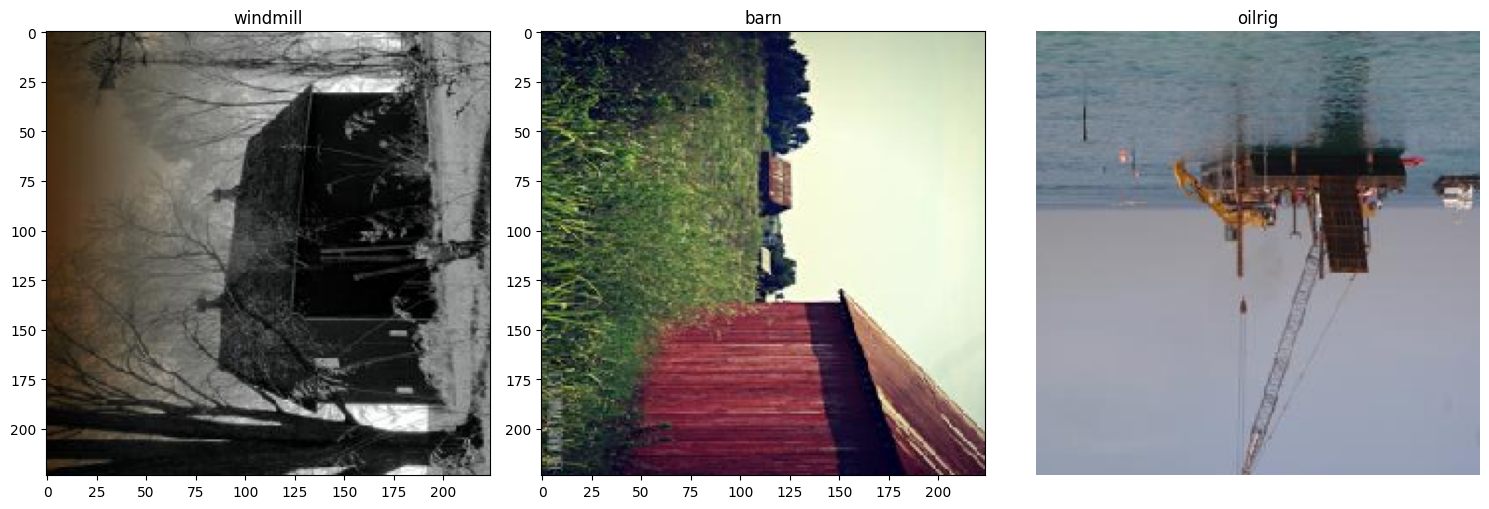

In [16]:
LoadData.plot_random()

## ResNet50

In [9]:
NUM_CLASSES = len(train.class_indices)
EPOCHS = 30

In [12]:
if AUGMENT:
    model_dir = os.path.join("ResNet","augment")
else:
    model_dir = os.path.join("ResNet","base")
    
checkpoint_filepath = os.path.join(model_dir,"{epoch:02d}-{val_accuracy:.2f}.keras")

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks = [
             EarlyStopping(patience=5, monitor="val_accuracy", mode="max"),
             model_checkpoint_callback,
]


In [11]:
# Step 1: Load ResNet architecture without top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add custom classifier on top
x = GlobalAveragePooling2D()(resnet_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Adjust num_classes according to your task

model = Model(inputs=resnet_base.input, outputs=predictions)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train, epochs=EPOCHS, validation_data=val, callbacks = callbacks)

Epoch 1/30


2024-05-31 12:14:51.191567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


342/342 [==============================] - 1089s 3s/step - loss: 1.8692 - accuracy: 0.5703 - val_loss: 3.2536 - val_accuracy: 0.1000
Epoch 2/30
342/342 [==============================] - 924s 3s/step - loss: 0.9691 - accuracy: 0.7369 - val_loss: 2.6717 - val_accuracy: 0.2250
Epoch 3/30
342/342 [==============================] - 916s 3s/step - loss: 0.7944 - accuracy: 0.7794 - val_loss: 1.1897 - val_accuracy: 0.6640
Epoch 4/30
342/342 [==============================] - 925s 3s/step - loss: 0.6632 - accuracy: 0.8096 - val_loss: 0.8089 - val_accuracy: 0.7870
Epoch 5/30
342/342 [==============================] - 931s 3s/step - loss: 0.5853 - accuracy: 0.8274 - val_loss: 1.6413 - val_accuracy: 0.6320
Epoch 6/30
342/342 [==============================] - 932s 3s/step - loss: 0.5381 - accuracy: 0.8380 - val_loss: 0.8329 - val_accuracy: 0.7540
Epoch 7/30
342/342 [==============================] - 932s 3s/step - loss: 0.5521 - accuracy: 0.8356 - val_loss: 3.5705 - val_accuracy: 0.3730
Epoch 8/3

In [14]:
history1 = model.fit(train, epochs=EPOCHS, validation_data=val, callbacks = callbacks)

Epoch 1/30
342/342 [==============================] - 937s 3s/step - loss: 0.5297 - accuracy: 0.8436 - val_loss: 0.9710 - val_accuracy: 0.7320
Epoch 2/30
342/342 [==============================] - 923s 3s/step - loss: 0.5275 - accuracy: 0.8462 - val_loss: 1.3307 - val_accuracy: 0.6460
Epoch 3/30
342/342 [==============================] - 940s 3s/step - loss: 0.5212 - accuracy: 0.8462 - val_loss: 2.8722 - val_accuracy: 0.5050
Epoch 4/30
342/342 [==============================] - 963s 3s/step - loss: 0.5307 - accuracy: 0.8448 - val_loss: 1.3355 - val_accuracy: 0.6740
Epoch 5/30
342/342 [==============================] - 956s 3s/step - loss: 0.5046 - accuracy: 0.8515 - val_loss: 0.8419 - val_accuracy: 0.7690
Epoch 6/30
342/342 [==============================] - 1032s 3s/step - loss: 0.5381 - accuracy: 0.8490 - val_loss: 2.7334 - val_accuracy: 0.4450
Epoch 7/30
342/342 [==============================] - 962s 3s/step - loss: 0.5247 - accuracy: 0.8523 - val_loss: 0.7058 - val_accuracy: 0.810

In [13]:
import os
ResNet_model = tf.keras.models.load_model(
    os.path.join(model_dir, "08-0.84.keras")
)

2024-06-06 18:37:40.982749: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-06-06 18:37:40.982776: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-06 18:37:40.982785: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-06 18:37:40.982833: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-06 18:37:40.982854: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
test_predictions = ResNet_model.predict(test)

2024-06-06 18:38:36.642533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 38s 609ms/step


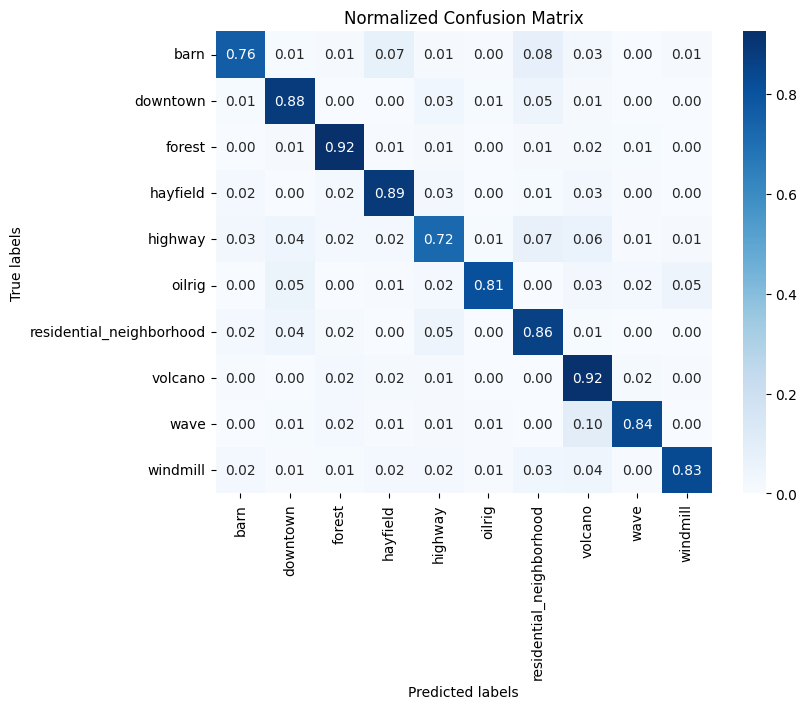

In [20]:
test_predictions = np.argmax(test_predictions, axis = 1)

results = Metrics(title = "EuroSAT")
results.run(test.classes, test_predictions, method_name = "ResNet50")
results.plot()

plot_confusion_matrix(test.classes, test_predictions, classes = test.class_indices.keys())